# Dataset Preparation


In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiffanq","key":"3de5bf5f2966cf71e5d73ad9e3d966fc"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [00:41<00:00, 138MB/s]
100% 3.58G/3.58G [00:41<00:00, 91.7MB/s]


In [ ]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

100% 1.40G/1.41G [00:17<00:00, 136MB/s]
100% 1.41G/1.41G [00:17<00:00, 86.8MB/s]


In [ ]:
local_zip = '/content/fresh-and-stale-images-of-fruits-and-vegetables.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!kaggle datasets download -d muhriddinmuxiddinov/fruits-and-vegetables-dataset

 98% 856M/870M [00:15<00:00, 126MB/s]
100% 870M/870M [00:16<00:00, 56.9MB/s]


In [ ]:
local_zip = '/content/fruits-and-vegetables-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Split Data into Train and Test

In [ ]:
root_dir = '/content/dataset-fruits-vegetables'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  training = 'training'
  testing = 'testing'

  f_apple = 'fresh_apple'
  f_banana = 'fresh_banana'
  f_orange = 'fresh_orange'
  f_tomato = 'fresh_tomato'
  f_cucumber = 'fresh_cucumber'
  f_carrot = 'fresh_carrot'
  f_mango = 'fresh_mango'
  f_strawberry = 'fresh_strawberry'
  f_bellpepper = 'fresh_bellpepper'

  r_apple = 'rotten_apple'
  r_banana = 'rotten_banana'
  r_orange = 'rotten_orange'
  r_tomato = 'rotten_tomato'
  r_cucumber = 'rotten_cucumber'
  r_carrot = 'rotten_carrot'
  r_mango = 'rotten_mango'
  r_strawberry = 'rotten_strawberry'
  r_bellpepper = 'rotten_bellpepper'


  # Training and Testing
  path1 = os.path.join(root_dir, training)
  os.makedirs(path1)
  path2 = os.path.join(root_dir, testing)
  os.makedirs(path2)

  # Training for fresh ingredients
  path1_f_apple = os.path.join(path1, f_apple)
  os.makedirs(path1_f_apple)
  path1_f_banana = os.path.join(path1, f_banana)
  os.makedirs(path1_f_banana)
  path1_f_orange = os.path.join(path1, f_orange)
  os.makedirs(path1_f_orange)
  path1_f_tomato = os.path.join(path1, f_tomato)
  os.makedirs(path1_f_tomato)
  path1_f_cucumber = os.path.join(path1, f_cucumber)
  os.makedirs(path1_f_cucumber)
  path1_f_carrot = os.path.join(path1, f_carrot)
  os.makedirs(path1_f_carrot)
  path1_f_mango = os.path.join(path1, f_mango)
  os.makedirs(path1_f_mango)
  path1_f_strawberry = os.path.join(path1, f_strawberry)
  os.makedirs(path1_f_strawberry)
  path1_f_bellpepper = os.path.join(path1, f_bellpepper)
  os.makedirs(path1_f_bellpepper)

  # Training for rotten ingredients
  path1_r_apple = os.path.join(path1, r_apple)
  os.makedirs(path1_r_apple)
  path1_r_banana = os.path.join(path1, r_banana)
  os.makedirs(path1_r_banana)
  path1_r_orange = os.path.join(path1, r_orange)
  os.makedirs(path1_r_orange)
  path1_r_tomato = os.path.join(path1, r_tomato)
  os.makedirs(path1_r_tomato)
  path1_r_cucumber = os.path.join(path1, r_cucumber)
  os.makedirs(path1_r_cucumber)
  path1_r_carrot = os.path.join(path1, r_carrot)
  os.makedirs(path1_r_carrot)
  path1_r_mango = os.path.join(path1, r_mango)
  os.makedirs(path1_r_mango)
  path1_r_strawberry = os.path.join(path1, r_strawberry)
  os.makedirs(path1_r_strawberry)
  path1_r_bellpepper = os.path.join(path1, r_bellpepper)
  os.makedirs(path1_r_bellpepper)

  # Testing for fresh ingredients
  path2_f_apple = os.path.join(path2, f_apple)
  os.makedirs(path2_f_apple)
  path2_f_banana = os.path.join(path2, f_banana)
  os.makedirs(path2_f_banana)
  path2_f_orange = os.path.join(path2, f_orange)
  os.makedirs(path2_f_orange)
  path2_f_tomato = os.path.join(path2, f_tomato)
  os.makedirs(path2_f_tomato)
  path2_f_cucumber = os.path.join(path2, f_cucumber)
  os.makedirs(path2_f_cucumber)
  path2_f_carrot = os.path.join(path2, f_carrot)
  os.makedirs(path2_f_carrot)
  path2_f_mango = os.path.join(path2, f_mango)
  os.makedirs(path2_f_mango)
  path2_f_strawberry = os.path.join(path2, f_strawberry)
  os.makedirs(path2_f_strawberry)
  path2_f_bellpepper = os.path.join(path2, f_bellpepper)
  os.makedirs(path2_f_bellpepper)

  # Testing for rotten ingredients
  path2_r_apple = os.path.join(path2, r_apple)
  os.makedirs(path2_r_apple)
  path2_r_banana = os.path.join(path2, r_banana)
  os.makedirs(path2_r_banana)
  path2_r_orange = os.path.join(path2, r_orange)
  os.makedirs(path2_r_orange)
  path2_r_tomato = os.path.join(path2, r_tomato)
  os.makedirs(path2_r_tomato)
  path2_r_cucumber = os.path.join(path2, r_cucumber)
  os.makedirs(path2_r_cucumber)
  path2_r_carrot = os.path.join(path2, r_carrot)
  os.makedirs(path2_r_carrot)
  path2_r_mango = os.path.join(path2, r_mango)
  os.makedirs(path2_r_mango)
  path2_r_strawberry = os.path.join(path2, r_strawberry)
  os.makedirs(path2_r_strawberry)
  path2_r_bellpepper = os.path.join(path2, r_bellpepper)
  os.makedirs(path2_r_bellpepper)


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/dataset-fruits-vegetables/testing
/content/dataset-fruits-vegetables/training
/content/dataset-fruits-vegetables/testing/fresh_tomato
/content/dataset-fruits-vegetables/testing/rotten_tomato
/content/dataset-fruits-vegetables/testing/rotten_banana
/content/dataset-fruits-vegetables/testing/rotten_carrot
/content/dataset-fruits-vegetables/testing/fresh_carrot
/content/dataset-fruits-vegetables/testing/rotten_cucumber
/content/dataset-fruits-vegetables/testing/fresh_mango
/content/dataset-fruits-vegetables/testing/rotten_mango
/content/dataset-fruits-vegetables/testing/rotten_bellpepper
/content/dataset-fruits-vegetables/testing/fresh_bellpepper
/content/dataset-fruits-vegetables/testing/fresh_banana
/content/dataset-fruits-vegetables/testing/rotten_apple
/content/dataset-fruits-vegetables/testing/fresh_strawberry
/content/dataset-fruits-vegetables/testing/rotten_strawberry
/content/dataset-fruits-vegetables/testing/rotten_orange
/content/dataset-fruits-vegetables/testing/fresh_

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  temp_list = []
  for image in os.listdir(SOURCE_DIR):
    file_name = os.path.join(SOURCE_DIR, image)
    if os.path.getsize(file_name) > 0:
      temp_list.append(image)
    else:
      print("{} is zero length, so ignoring.".format(image))

  train_total = int(len(temp_list)*SPLIT_SIZE)
  #validation_total = len(temp_list) - train_total
  shuffled_list = random.sample(temp_list, len(temp_list))
  train_list = shuffled_list[0:train_total]
  validation_list = shuffled_list[train_total:len(temp_list)]

  for t in train_list:
    path = os.path.join(SOURCE_DIR, t)
    path1 = os.path.join(TRAINING_DIR, t)
    copyfile(path, path1)

  for v in validation_list:
    path = os.path.join(SOURCE_DIR, v)
    path1 = os.path.join(VALIDATION_DIR, v)
    copyfile(path, path1)


In [ ]:
#### FRESH INGREDIENTS

# Define paths
F_APPLE_SOURCE_DIR = "/content/fresh_apple"
F_BANANA_SOURCE_DIR = "/content/fresh_banana"
F_ORANGE_SOURCE_DIR = "/content/fresh_orange"
F_TOMATO_SOURCE_DIR = "/content/fresh_tomato"
F_CUCUMBER_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCucumber"
F_CARROT_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot"
F_MANGO_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Fruits/FreshMango"
F_STRAWBERRY_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Fruits/FreshStrawberry"
F_BELLPEPPER_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshBellpepper"


TRAINING_DIR = "/content/dataset-fruits-vegetables/training"
VALIDATION_DIR = "/content/dataset-fruits-vegetables/testing"

TRAINING_F_APPLE_DIR = os.path.join(TRAINING_DIR, "fresh_apple/")
VALIDATION_F_APPLE_DIR = os.path.join(VALIDATION_DIR, "fresh_apple/")

TRAINING_F_BANANA_DIR = os.path.join(TRAINING_DIR, "fresh_banana/")
VALIDATION_F_BANANA_DIR = os.path.join(VALIDATION_DIR, "fresh_banana/")

TRAINING_F_ORANGE_DIR = os.path.join(TRAINING_DIR, "fresh_orange/")
VALIDATION_F_ORANGE_DIR = os.path.join(VALIDATION_DIR, "fresh_orange/")

TRAINING_F_TOMATO_DIR = os.path.join(TRAINING_DIR, "fresh_tomato/")
VALIDATION_F_TOMATO_DIR = os.path.join(VALIDATION_DIR, "fresh_tomato/")

TRAINING_F_CUCUMBER_DIR = os.path.join(TRAINING_DIR, "fresh_cucumber/")
VALIDATION_F_CUCUMBER_DIR = os.path.join(VALIDATION_DIR, "fresh_cucumber/")

TRAINING_F_CARROT_DIR = os.path.join(TRAINING_DIR, "fresh_carrot/")
VALIDATION_F_CARROT_DIR = os.path.join(VALIDATION_DIR, "fresh_carrot/")

TRAINING_F_MANGO_DIR = os.path.join(TRAINING_DIR, "fresh_mango/")
VALIDATION_F_MANGO_DIR = os.path.join(VALIDATION_DIR, "fresh_mango/")

TRAINING_F_STRAWBERRY_DIR = os.path.join(TRAINING_DIR, "fresh_strawberry/")
VALIDATION_F_STRAWBERRY_DIR = os.path.join(VALIDATION_DIR, "fresh_strawberry/")

TRAINING_F_BELLPEPPER_DIR = os.path.join(TRAINING_DIR, "fresh_bellpepper/")
VALIDATION_F_BELLPEPPER_DIR = os.path.join(VALIDATION_DIR, "fresh_bellpepper/")


# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_F_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_F_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_BANANA_DIR)) > 0:
  for file in os.scandir(TRAINING_F_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_ORANGE_DIR)) > 0:
  for file in os.scandir(TRAINING_F_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_CUCUMBER_DIR)) > 0:
  for file in os.scandir(TRAINING_F_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_TOMATO_DIR)) > 0:
  for file in os.scandir(TRAINING_F_TOMATO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_CARROT_DIR)) > 0:
  for file in os.scandir(TRAINING_F_CARROT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_MANGO_DIR)) > 0:
  for file in os.scandir(TRAINING_F_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(TRAINING_F_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_BELLPEPPER_DIR)) > 0:
  for file in os.scandir(TRAINING_F_BELLPEPPER_DIR):
    os.remove(file.path)


if len(os.listdir(VALIDATION_F_APPLE_DIR )) > 0:
  for file in os.scandir(VALIDATION_F_APPLE_DIR ):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_BANANA_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_ORANGE_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_CUCUMBER_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_TOMATO_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_TOMATO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_CARROT_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_CARROT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_MANGO_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_BELLPEPPER_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_BELLPEPPER_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

split_data(F_APPLE_SOURCE_DIR, TRAINING_F_APPLE_DIR, VALIDATION_F_APPLE_DIR, .7)
split_data(F_BANANA_SOURCE_DIR, TRAINING_F_BANANA_DIR, VALIDATION_F_BANANA_DIR, .7)
split_data(F_ORANGE_SOURCE_DIR, TRAINING_F_ORANGE_DIR, VALIDATION_F_ORANGE_DIR, .7)
split_data(F_TOMATO_SOURCE_DIR, TRAINING_F_TOMATO_DIR, VALIDATION_F_TOMATO_DIR, split_size)
split_data(F_CUCUMBER_SOURCE_DIR, TRAINING_F_CUCUMBER_DIR, VALIDATION_F_CUCUMBER_DIR, split_size)
split_data(F_CARROT_SOURCE_DIR, TRAINING_F_CARROT_DIR, VALIDATION_F_CARROT_DIR, split_size)
split_data(F_MANGO_SOURCE_DIR, TRAINING_F_MANGO_DIR, VALIDATION_F_MANGO_DIR, split_size)
split_data(F_STRAWBERRY_SOURCE_DIR, TRAINING_F_STRAWBERRY_DIR, VALIDATION_F_STRAWBERRY_DIR, split_size)
split_data(F_BELLPEPPER_SOURCE_DIR, TRAINING_F_BELLPEPPER_DIR, VALIDATION_F_BELLPEPPER_DIR, split_size)

print(f"\n\nOriginal apple's directory has {len(os.listdir(F_APPLE_SOURCE_DIR))} images")
print(f"Original banana's directory has {len(os.listdir(F_BANANA_SOURCE_DIR))} images\n")
print(f"\n\nOriginal orange's directory has {len(os.listdir(F_ORANGE_SOURCE_DIR))} images")
print(f"Original tomato's directory has {len(os.listdir(F_TOMATO_SOURCE_DIR))} images\n")
print(f"\n\nOriginal cucumber's directory has {len(os.listdir(F_CUCUMBER_SOURCE_DIR))} images")
print(f"Original CARROT's directory has {len(os.listdir(F_CARROT_SOURCE_DIR))} images\n")
print(f"\n\nOriginal MANGO's directory has {len(os.listdir(F_MANGO_SOURCE_DIR))} images")
print(f"Original STRAWBERRY's directory has {len(os.listdir(F_STRAWBERRY_SOURCE_DIR))} images\n")
print(f"\n\nOriginal BELLPEPPER's directory has {len(os.listdir(F_BELLPEPPER_SOURCE_DIR))} images")

print(f"There are {len(os.listdir(TRAINING_F_APPLE_DIR))} images of apple for training")
print(f"There are {len(os.listdir(TRAINING_F_BANANA_DIR))} images of banana for training")
print(f"There are {len(os.listdir(TRAINING_F_ORANGE_DIR))} images of orange for training")
print(f"There are {len(os.listdir(TRAINING_F_TOMATO_DIR))} images of tomato for training")
print(f"There are {len(os.listdir(TRAINING_F_CUCUMBER_DIR))} images of cucumber for training")
print(f"There are {len(os.listdir(TRAINING_F_CARROT_DIR))} images of CARROT for training")
print(f"There are {len(os.listdir(TRAINING_F_MANGO_DIR))} images of MANGO for training")
print(f"There are {len(os.listdir(TRAINING_F_STRAWBERRY_DIR))} images of STRAWBERRY for training")
print(f"There are {len(os.listdir(TRAINING_F_BELLPEPPER_DIR))} images of BELLPEPPER for training")


print(f"There are {len(os.listdir(VALIDATION_F_APPLE_DIR))} images of apples for validation")
print(f"There are {len(os.listdir(VALIDATION_F_BANANA_DIR))} images of banana for validation")
print(f"There are {len(os.listdir(VALIDATION_F_ORANGE_DIR))} images of oranges for validation")
print(f"There are {len(os.listdir(VALIDATION_F_TOMATO_DIR))} images of tomato for validation")
print(f"There are {len(os.listdir(VALIDATION_F_CUCUMBER_DIR))} images of cucumber for validation")
print(f"There are {len(os.listdir(VALIDATION_F_CARROT_DIR))} images of CARROT for validation")
print(f"There are {len(os.listdir(VALIDATION_F_MANGO_DIR))} images of MANGO for validation")
print(f"There are {len(os.listdir(VALIDATION_F_STRAWBERRY_DIR))} images of STRAWBERRY for validation")
print(f"There are {len(os.listdir(VALIDATION_F_BELLPEPPER_DIR))} images of BELLPEPPER for validation")



Original apple's directory has 1693 images
Original banana's directory has 1581 images



Original orange's directory has 1466 images
Original tomato's directory has 981 images



Original cucumber's directory has 608 images
Original CARROT's directory has 620 images



Original MANGO's directory has 605 images
Original STRAWBERRY's directory has 603 images



Original BELLPEPPER's directory has 611 images
There are 1185 images of apple for training
There are 1106 images of banana for training
There are 1026 images of orange for training
There are 784 images of tomato for training
There are 486 images of cucumber for training
There are 496 images of CARROT for training
There are 484 images of MANGO for training
There are 482 images of STRAWBERRY for training
There are 488 images of BELLPEPPER for training
There are 508 images of apples for validation
There are 475 images of banana for validation
There are 440 images of oranges for validation
There are 197 images of tomato for validat

In [ ]:
#### ROTTEN INGREDIENTS

# Define paths
R_APPLE_SOURCE_DIR = "/content/stale_apple"
R_BANANA_SOURCE_DIR = "/content/stale_banana"
R_ORANGE_SOURCE_DIR = "/content/stale_orange"
R_TOMATO_SOURCE_DIR = "/content/stale_tomato"
R_CUCUMBER_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/RottenCucumber"
R_CARROT_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/RottenCarrot"
R_MANGO_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Fruits/RottenMango"
R_STRAWBERRY_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Fruits/RottenStrawberry"
R_BELLPEPPER_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/RottenBellpepper"

#TRAINING_DIR = "/content/dataset-fruits-vegetables/training"
#VALIDATION_DIR = "/content/dataset-fruits-vegetables/testing"

TRAINING_R_APPLE_DIR = os.path.join(TRAINING_DIR, "rotten_apple/")
VALIDATION_R_APPLE_DIR = os.path.join(VALIDATION_DIR, "rotten_apple/")

TRAINING_R_BANANA_DIR = os.path.join(TRAINING_DIR, "rotten_banana/")
VALIDATION_R_BANANA_DIR = os.path.join(VALIDATION_DIR, "rotten_banana/")

TRAINING_R_ORANGE_DIR = os.path.join(TRAINING_DIR, "rotten_orange/")
VALIDATION_R_ORANGE_DIR = os.path.join(VALIDATION_DIR, "rotten_orange/")

TRAINING_R_TOMATO_DIR = os.path.join(TRAINING_DIR, "rotten_tomato/")
VALIDATION_R_TOMATO_DIR = os.path.join(VALIDATION_DIR, "rotten_tomato/")

TRAINING_R_CUCUMBER_DIR = os.path.join(TRAINING_DIR, "rotten_cucumber/")
VALIDATION_R_CUCUMBER_DIR = os.path.join(VALIDATION_DIR, "rotten_cucumber/")

TRAINING_R_CARROT_DIR = os.path.join(TRAINING_DIR, "rotten_carrot/")
VALIDATION_R_CARROT_DIR = os.path.join(VALIDATION_DIR, "rotten_carrot/")

TRAINING_R_MANGO_DIR = os.path.join(TRAINING_DIR, "rotten_mango/")
VALIDATION_R_MANGO_DIR = os.path.join(VALIDATION_DIR, "rotten_mango/")

TRAINING_R_STRAWBERRY_DIR = os.path.join(TRAINING_DIR, "rotten_strawberry/")
VALIDATION_R_STRAWBERRY_DIR = os.path.join(VALIDATION_DIR, "rotten_strawberry/")

TRAINING_R_BELLPEPPER_DIR = os.path.join(TRAINING_DIR, "rotten_bellpepper/")
VALIDATION_R_BELLPEPPER_DIR = os.path.join(VALIDATION_DIR, "rotten_bellpepper/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_R_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_R_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_BANANA_DIR)) > 0:
  for file in os.scandir(TRAINING_R_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_ORANGE_DIR)) > 0:
  for file in os.scandir(TRAINING_R_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_CUCUMBER_DIR)) > 0:
  for file in os.scandir(TRAINING_R_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_TOMATO_DIR)) > 0:
  for file in os.scandir(TRAINING_R_TOMATO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_CARROT_DIR)) > 0:
  for file in os.scandir(TRAINING_R_CARROT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_MANGO_DIR)) > 0:
  for file in os.scandir(TRAINING_R_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(TRAINING_R_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_BELLPEPPER_DIR)) > 0:
  for file in os.scandir(TRAINING_R_BELLPEPPER_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_R_APPLE_DIR )) > 0:
  for file in os.scandir(VALIDATION_R_APPLE_DIR ):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_BANANA_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_ORANGE_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_CUCUMBER_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_TOMATO_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_TOMATO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_CARROT_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_CARROT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_MANGO_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_BELLPEPPER_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_BELLPEPPER_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

split_data(R_APPLE_SOURCE_DIR, TRAINING_R_APPLE_DIR, VALIDATION_R_APPLE_DIR, .7)
split_data(R_BANANA_SOURCE_DIR, TRAINING_R_BANANA_DIR, VALIDATION_R_BANANA_DIR, .7)
split_data(R_ORANGE_SOURCE_DIR, TRAINING_R_ORANGE_DIR, VALIDATION_R_ORANGE_DIR, .7)
split_data(R_TOMATO_SOURCE_DIR, TRAINING_R_TOMATO_DIR, VALIDATION_R_TOMATO_DIR, split_size)
split_data(R_CUCUMBER_SOURCE_DIR, TRAINING_R_CUCUMBER_DIR, VALIDATION_R_CUCUMBER_DIR, split_size)
split_data(R_CARROT_SOURCE_DIR, TRAINING_R_CARROT_DIR, VALIDATION_R_CARROT_DIR, split_size)
split_data(R_MANGO_SOURCE_DIR, TRAINING_R_MANGO_DIR, VALIDATION_R_MANGO_DIR, split_size)
split_data(R_STRAWBERRY_SOURCE_DIR, TRAINING_R_STRAWBERRY_DIR, VALIDATION_R_STRAWBERRY_DIR, split_size)
split_data(R_BELLPEPPER_SOURCE_DIR, TRAINING_R_BELLPEPPER_DIR, VALIDATION_R_BELLPEPPER_DIR, split_size)

print(f"\n\nOriginal apple's directory has {len(os.listdir(R_APPLE_SOURCE_DIR))} images")
print(f"Original banana's directory has {len(os.listdir(R_BANANA_SOURCE_DIR))} images\n")
print(f"\n\nOriginal orange's directory has {len(os.listdir(R_ORANGE_SOURCE_DIR))} images")
print(f"Original tomato's directory has {len(os.listdir(R_TOMATO_SOURCE_DIR))} images\n")
print(f"\n\nOriginal cucumber's directory has {len(os.listdir(R_CUCUMBER_SOURCE_DIR))} images")
print(f"Original CARROT's directory has {len(os.listdir(R_CARROT_SOURCE_DIR))} images\n")
print(f"\n\nOriginal MANGO's directory has {len(os.listdir(R_MANGO_SOURCE_DIR))} images")
print(f"Original STRAWBERRY's directory has {len(os.listdir(R_STRAWBERRY_SOURCE_DIR))} images\n")
print(f"\n\nOriginal BELLPEPPER's directory has {len(os.listdir(R_BELLPEPPER_SOURCE_DIR))} images")

print(f"There are {len(os.listdir(TRAINING_R_APPLE_DIR))} images of apple for training")
print(f"There are {len(os.listdir(TRAINING_R_BANANA_DIR))} images of banana for training")
print(f"There are {len(os.listdir(TRAINING_R_ORANGE_DIR))} images of orange for training")
print(f"There are {len(os.listdir(TRAINING_R_TOMATO_DIR))} images of tomato for training")
print(f"There are {len(os.listdir(TRAINING_R_CUCUMBER_DIR))} images of cucumber for training")
print(f"There are {len(os.listdir(TRAINING_R_CARROT_DIR))} images of CARROT for training")
print(f"There are {len(os.listdir(TRAINING_R_MANGO_DIR))} images of MANGO for training")
print(f"There are {len(os.listdir(TRAINING_R_STRAWBERRY_DIR))} images of STRAWBERRY for training")
print(f"There are {len(os.listdir(TRAINING_R_BELLPEPPER_DIR))} images of BELLPEPPER for training")


print(f"There are {len(os.listdir(VALIDATION_R_APPLE_DIR))} images of apples for validation")
print(f"There are {len(os.listdir(VALIDATION_R_BANANA_DIR))} images of banana for validation")
print(f"There are {len(os.listdir(VALIDATION_R_ORANGE_DIR))} images of oranges for validation")
print(f"There are {len(os.listdir(VALIDATION_R_TOMATO_DIR))} images of tomato for validation")
print(f"There are {len(os.listdir(VALIDATION_R_CUCUMBER_DIR))} images of cucumber for validation")
print(f"There are {len(os.listdir(VALIDATION_R_CARROT_DIR))} images of CARROT for validation")
print(f"There are {len(os.listdir(VALIDATION_R_MANGO_DIR))} images of MANGO for validation")
print(f"There are {len(os.listdir(VALIDATION_R_STRAWBERRY_DIR))} images of STRAWBERRY for validation")
print(f"There are {len(os.listdir(VALIDATION_R_BELLPEPPER_DIR))} images of BELLPEPPER for validation")



Original apple's directory has 2342 images
Original banana's directory has 1467 images



Original orange's directory has 1595 images
Original tomato's directory has 982 images



Original cucumber's directory has 593 images
Original CARROT's directory has 580 images



Original MANGO's directory has 593 images
Original STRAWBERRY's directory has 596 images



Original BELLPEPPER's directory has 591 images
There are 1639 images of apple for training
There are 1026 images of banana for training
There are 1116 images of orange for training
There are 785 images of tomato for training
There are 474 images of cucumber for training
There are 464 images of CARROT for training
There are 474 images of MANGO for training
There are 476 images of STRAWBERRY for training
There are 472 images of BELLPEPPER for training
There are 703 images of apples for validation
There are 441 images of banana for validation
There are 479 images of oranges for validation
There are 197 images of tomato for validat

In [ ]:
labels = []
for label in os.listdir('/content/dataset-fruits-vegetables/training/'):
  labels.append(label)

NUM_LABELS = len(labels)
print(NUM_LABELS)
print(labels)

18
['fresh_tomato', 'rotten_tomato', 'rotten_banana', 'rotten_carrot', 'fresh_carrot', 'rotten_cucumber', 'fresh_mango', 'rotten_mango', 'rotten_bellpepper', 'fresh_bellpepper', 'fresh_banana', 'rotten_apple', 'fresh_strawberry', 'rotten_strawberry', 'rotten_orange', 'fresh_cucumber', 'fresh_apple', 'fresh_orange']


# Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size = 32,
                                                      shuffle = True,
                                                      classes = labels,
                                                      class_mode='categorical',
                                                      target_size=(150,150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=1,
                                                                classes=labels,
                                                                class_mode='categorical',
                                                                target_size=(150,150))

Found 13461 images belonging to 18 classes.
Found 4644 images belonging to 18 classes.


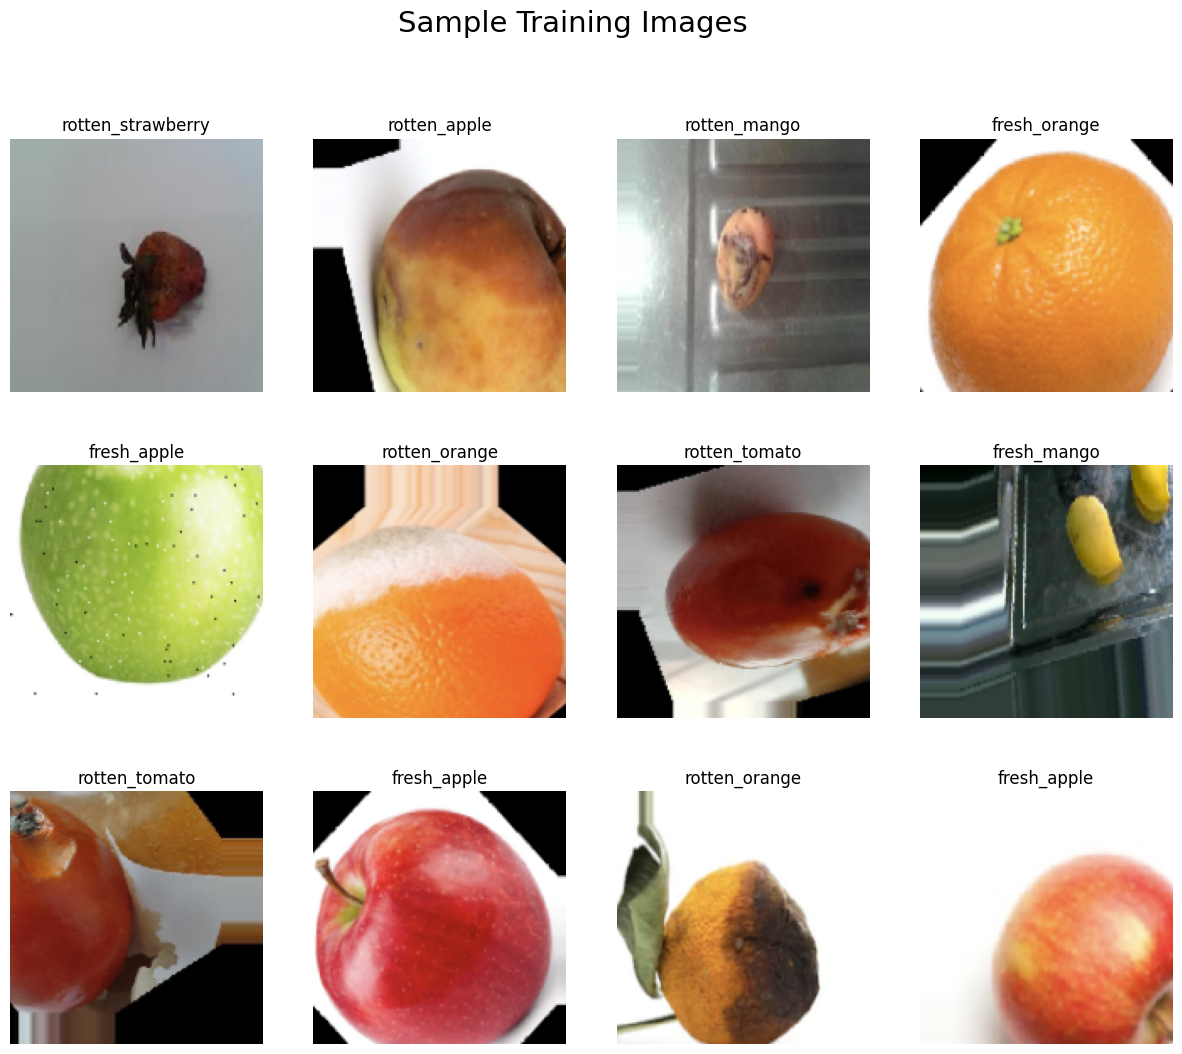

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i,j].set_title(f"{label}")
        ax[i,j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i,j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()


# Train Model

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
# model.compile(optimizer='adam',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])

In [ ]:
## Transfer Learning
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(18, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("\n90% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    )

Epoch 1/10
421/421 [==============================] - 230s 511ms/step - loss: 2.2175 - accuracy: 0.7626 - val_loss: 0.2873 - val_accuracy: 0.9149
Epoch 2/10
421/421 [==============================] - 211s 501ms/step - loss: 0.4919 - accuracy: 0.8418 - val_loss: 0.2829 - val_accuracy: 0.9147
Epoch 3/10
421/421 [==============================] - 212s 503ms/step - loss: 0.4409 - accuracy: 0.8611 - val_loss: 0.2747 - val_accuracy: 0.9117
Epoch 4/10
421/421 [==============================] - 210s 500ms/step - loss: 0.3829 - accuracy: 0.8757 - val_loss: 0.1993 - val_accuracy: 0.9345
Epoch 5/10
421/421 [==============================] - 209s 497ms/step - loss: 0.3473 - accuracy: 0.8886 - val_loss: 0.1880 - val_accuracy: 0.9399
Epoch 6/10
421/421 [==============================] - 210s 499ms/step - loss: 0.3742 - accuracy: 0.8786 - val_loss: 0.1928 - val_accuracy: 0.9399
Epoch 7/10
421/421 [==============================] - 223s 529ms/step - loss: 0.3640 - accuracy: 0.8884 - val_loss: 0.1897 -

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)

print('\nValidation accuracy:', val_acc)
print(val_loss)

4644/4644 [==============================] - 83s 18ms/step - loss: 0.1829 - accuracy: 0.9470

Validation accuracy: 0.947028398513794
0.1828778088092804


<Figure size 640x480 with 0 Axes>

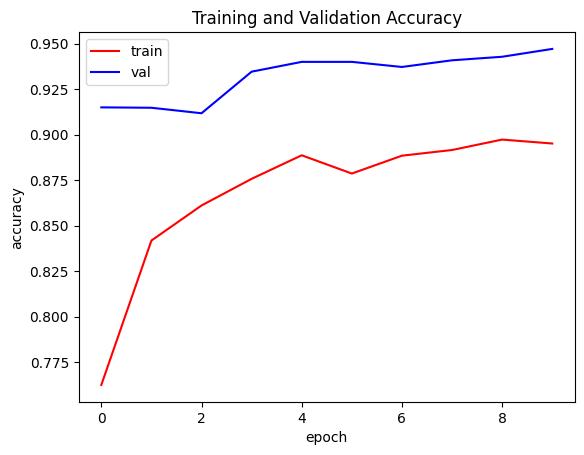

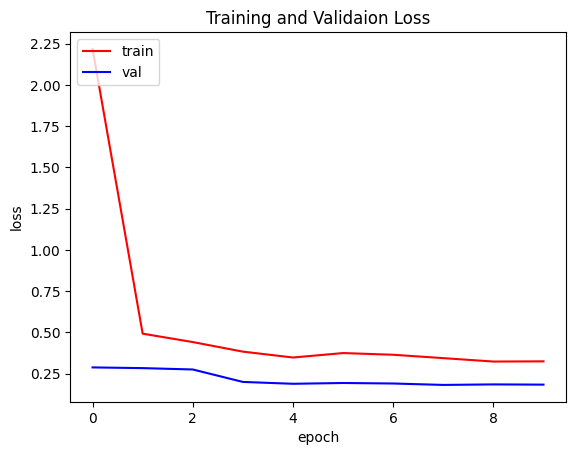

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

# Predict Images

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  res = np.argmax(classes,axis=1)
  percentage = classes[0][res[0]]

  print(labels[res[0]])
  print(classes)
  print(res)
  print(percentage)
  print("{0:.0f}%".format(percentage * 100))

Saving fresh_banana.png to fresh_banana.png
1/1 [==============================] - 0s 28ms/step
fresh_banana
[[2.41619358e-17 1.61771197e-14 1.18520795e-07 3.24457122e-14
  5.81468584e-16 4.36750735e-17 1.09375729e-22 8.21716930e-19
  1.59465811e-15 6.14185069e-19 9.99999881e-01 2.15427756e-16
  2.99496372e-21 4.69365139e-23 8.07867635e-14 5.67864321e-17
  4.89062015e-21 1.06826169e-14]]
[10]
0.9999999
100%


# Deployment